## import

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from vae_pipeline import run_vae_pipeline
from evaluate_anomaly import evaluate_anomaly_detection
import preprocess

2025-12-18 01:54:15.620128: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-18 01:54:15.621441: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-18 01:54:15.658860: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-18 01:54:15.785856: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-18 01:54:17.003607: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [3]:
RAW_DIR = Path("../data/raw")
INTERIM_DIR = Path("../data/interim")
PROCESSED_DIR = Path("../data/processed")

## T1105(full) DrainによるEventId

### データ作成

In [4]:
preprocess.prepare_deeplog_file(
    logdata_filepath = RAW_DIR/"T1105(full)/security2_structured.csv",
    output_dir = INTERIM_DIR/"T1105(full)",
    window_size = 100,
    step_size = 50,
    mode = "fixed", 
    features = ["EventId"]
)

there are 20552 instances (sliding windows) in this dataset

training size 16425
test normal size 4107
test abnormal size 20
Sequence Length Statistics Report
Generated: 2025-12-17 22:09:23
Mode: fixed
Window Size: 100
Step Size: 50

[Ratio: 0.8]
--------------------------------------------------
  train:
    Count:    16,425
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00
  test_normal:
    Count:    4,107
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00
  test_abnormal:
    Count:    20
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00


Statistics saved to: ../data/interim/T1105(full)/seq_stats.txt


In [ ]:
# one-hot-embed でテンソルへ変換
preprocess.convert_deeplog_to_ohe_npz(
    input_dir = Path("../data/interim/T1105(full)/ratio_0.8"),
    output_dir = Path("../data/processed/T1105(full)/ratio_0.8")
)

Building vocabulary from all data files...
Vocab size: 57
Processing ../data/interim/T1105(full)/ratio_0.8/train ...
  Max sequence length: 100
  Saved to ../data/processed/T1105(full)/ratio_0.8/train.npz (Shape: (16425, 100, 57))
Processing ../data/interim/T1105(full)/ratio_0.8/test_normal ...
  Max sequence length: 100
  Saved to ../data/processed/T1105(full)/ratio_0.8/test_normal.npz (Shape: (4107, 100, 57))
Processing ../data/interim/T1105(full)/ratio_0.8/test_abnormal ...
  Max sequence length: 100
  Saved to ../data/processed/T1105(full)/ratio_0.8/test_abnormal.npz (Shape: (20, 100, 57))
Done.


### train

2025-12-17 22:15:35.161661: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22323 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-12-17 22:15:35.163527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22323 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-12-17 22:15:35.165132: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22323 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:81:00.0, compute capability: 8.6
2025-12-17 22:15:35.166760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22323 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

Epoch 1/1000


I0000 00:00:1765977343.583586  509516 service.cc:145] XLA service 0x76a8bc014dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765977343.583634  509516 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765977343.583639  509516 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765977343.583643  509516 service.cc:153]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765977343.583647  509516 service.cc:153]   StreamExecutor device (3): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-12-17 22:15:44.168189: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-17 22:15:44.978696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 31/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 85.4673 - loss: 17159.7200 - reconstruction_loss: 5691.4176 

I0000 00:00:1765977348.553178  509516 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


924/924 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - kl_loss: 241.4605 - loss: 2666.7617 - reconstruction_loss: 808.4329 - learning_rate: 0.0010
Epoch 2/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - kl_loss: 219.0599 - loss: 2135.3328 - reconstruction_loss: 638.7581 - learning_rate: 0.0010
Epoch 3/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 197.0079 - loss: 2071.5811 - reconstruction_loss: 624.8571 - learning_rate: 0.0010
Epoch 4/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 184.2025 - loss: 2032.3474 - reconstruction_loss: 616.0483 - learning_rate: 0.0010
Epoch 5/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 178.3194 - loss: 2004.9220 - reconstruction_loss: 608.8675 - learning_rate: 0.0010
Epoch 6/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 176.9534 - loss: 1983.8058 - reconstruction_loss: 602.2839 - learning_rate: 0.0010
Epoch 7/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 177.9750 - loss: 1965.8391 - reconstruction_loss: 595.9545 

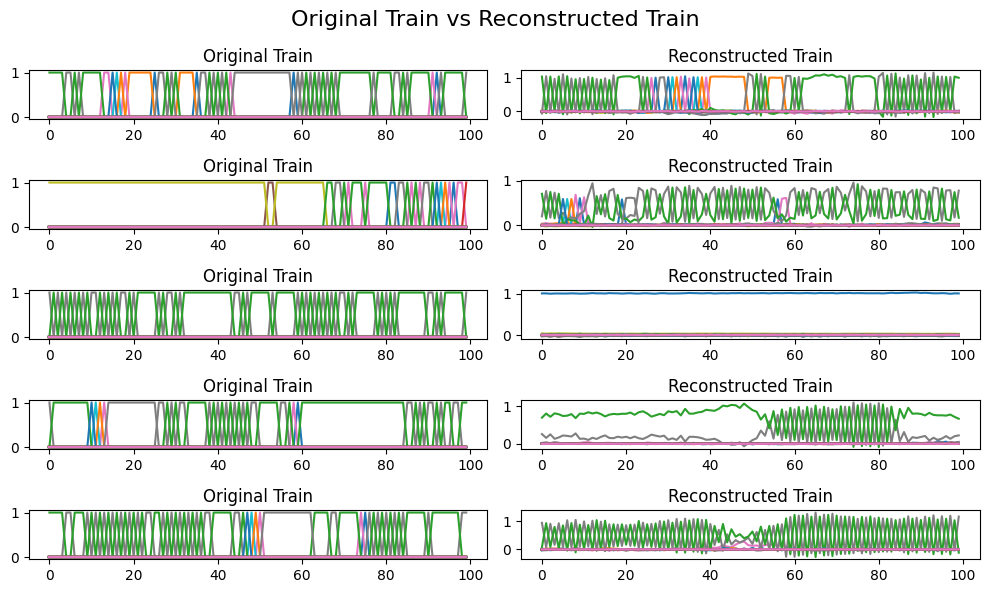

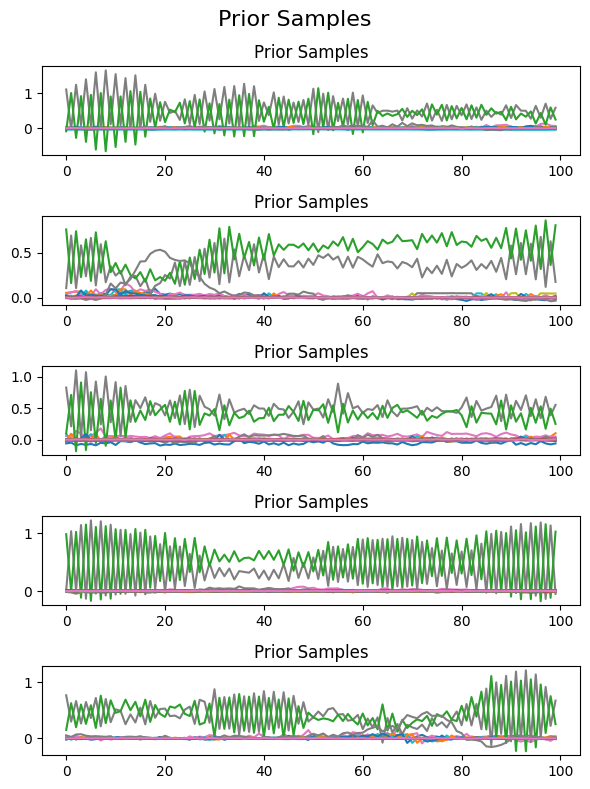

FileNotFoundError: [Errno 2] No such file or directory: '/home/siwamura/timeVAE/outputs/tsne/T1105(full)/ratio_0.8/train/Model-timeVAE Dataset-T1105(full)/ratio_0.8/train.png'

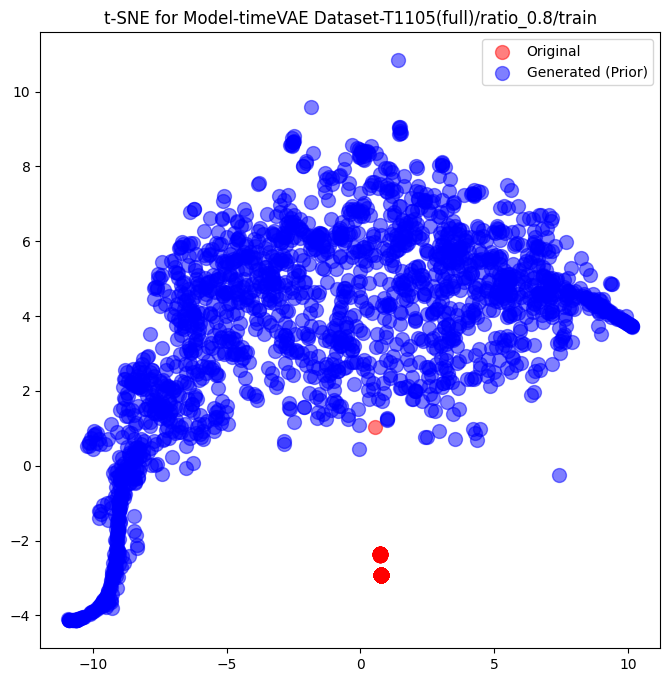

In [7]:
run_vae_pipeline(
    dataset_file = "T1105(full)/ratio_0.8/train", # 拡張子不要
    vae_type = "timeVAE",
)

### test

In [4]:
evaluate_anomaly_detection(
    model_dir = "../outputs/models/T1105(full)/ratio_0.8/train",
    test_data_dir = "../data/processed/T1105(full)/ratio_0.8",
    save_results_dir = "../results/T1105(full)/ratio_0.8/train",
)

スケーラーを読み込んでいます: ../outputs/models/T1105(full)/ratio_0.8/train...
モデル (timeVAE) を読み込んでいます: ../outputs/models/T1105(full)/ratio_0.8/train...


2025-12-18 00:13:43.228957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22323 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-12-18 00:13:43.230831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22323 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-12-18 00:13:43.232595: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22323 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:81:00.0, compute capability: 8.6
2025-12-18 00:13:43.234216: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22323 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

テストデータを読み込んでいます...
正常データ形状: (4107, 100, 57)
異常データ形状: (20, 100, 57)
推論を実行中...


I0000 00:00:1765984425.227372  645710 service.cc:145] XLA service 0x710ab4007d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765984425.227419  645710 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765984425.227424  645710 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765984425.227428  645710 service.cc:153]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765984425.227432  645710 service.cc:153]   StreamExecutor device (3): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-12-18 00:13:45.264106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-18 00:13:45.347266: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000

min: 5.0841474e-05 max: 8276004000000.0
has inf: False has nan: False
len: 4127

ROC AUC スコア: 0.8807
ベスト F1 スコア: 0.0253 (しきい値: 83596000452.525299)
混同行列:
[[4049   58]
 [  19    1]]
再構成誤差ヒストグラムを保存しました: ../results/T1105(full)/ratio_0.8/train/reconstruction_error_hist.png
Precision-Recall カーブを保存しました: ../results/T1105(full)/ratio_0.8/train/precision_recall_curve.png


## T1105(full)  sentence-BERT 埋め込み利用

### データ作成

In [4]:
preprocess.prepare_deeplog_file(
    logdata_filepath = RAW_DIR/"T1105(full)/security2_structured.csv",
    output_dir = INTERIM_DIR/"T1105(full)",
    window_size = 100,
    step_size = 50,
    mode = "fixed", 
    features = ["EventID"]
)

there are 20552 instances (sliding windows) in this dataset

training size 16425
test normal size 4107
test abnormal size 20
Sequence Length Statistics Report
Generated: 2025-12-18 01:54:37
Mode: fixed
Window Size: 100
Step Size: 50

[Ratio: 0.8]
--------------------------------------------------
  train:
    Count:    16,425
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00
  test_normal:
    Count:    4,107
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00
  test_abnormal:
    Count:    20
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00


Statistics saved to: ../data/interim/T1105(full)/seq_stats.txt


In [5]:
preprocess.convert_deeplog_to_embedding_npz(
    input_dir = "../data/interim/T1105(full)/ratio_0.8",
    output_dir = "../data/processed/T1105(full)/ratio_0.8",
    embedding_dir = "../data/embedding",
)

Loading embeddings from ../data/embedding ...
Embedding Vocab Size: 423, Dimension: 384
Processing ../data/interim/T1105(full)/ratio_0.8/train ...
  Max sequence length: 100
  No OOV tokens found.
  Saved to ../data/processed/T1105(full)/ratio_0.8/train.npz (Shape: (16425, 100, 384))
Processing ../data/interim/T1105(full)/ratio_0.8/test_normal ...
  Max sequence length: 100
  No OOV tokens found.
  Saved to ../data/processed/T1105(full)/ratio_0.8/test_normal.npz (Shape: (4107, 100, 384))
Processing ../data/interim/T1105(full)/ratio_0.8/test_abnormal ...
  Max sequence length: 100
  No OOV tokens found.
  Saved to ../data/processed/T1105(full)/ratio_0.8/test_abnormal.npz (Shape: (20, 100, 384))
Done.


### train